In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohanmeshram1","key":"b7ef94eb696989ad087108129c4aa570"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 87% 189M/218M [00:01<00:00, 221MB/s]
100% 218M/218M [00:01<00:00, 203MB/s]


In [4]:
!unzip cat-and-dog.zip -d cat-and-dog


Streaming output truncated to the last 5000 lines.
  inflating: cat-and-dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat-and-dog/tr

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import cv2

In [6]:
def count_images(directory):
  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
  image_count = 0
  for filename in os.listdir(directory):
    if filename.lower().endswith(image_extensions):
      image_count += 1
  return image_count
base_dir = '/content/cat-and-dog/training_set/training_set'
for entry in os.scandir(base_dir):
  if entry.is_dir():
    image_count = count_images(entry.path)
    print(f"{entry.name}: {image_count} images")

cats: 4000 images
dogs: 4005 images


In [7]:
def count_images(directory):
  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
  image_count = 0
  for filename in os.listdir(directory):
    if filename.lower().endswith(image_extensions):
      image_count += 1
  return image_count
base_dir = '/content/cat-and-dog/test_set/test_set'
for entry in os.scandir(base_dir):
  if entry.is_dir():
    image_count = count_images(entry.path)
    print(f"{entry.name}: {image_count} images")

cats: 1011 images
dogs: 1012 images


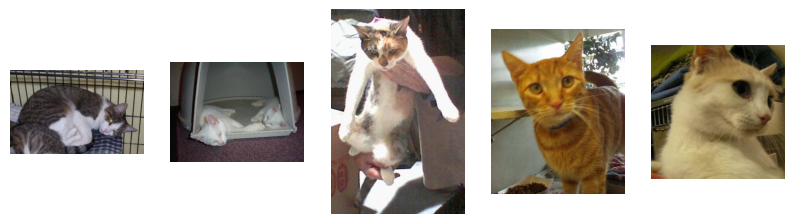

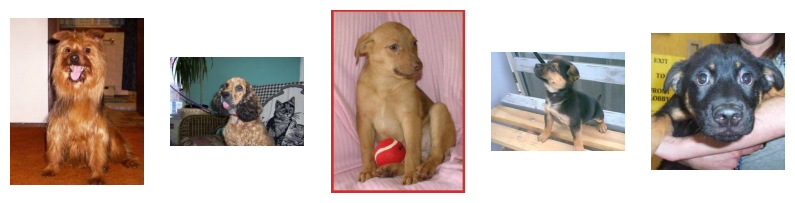

In [8]:
cats_dir = '/content/cat-and-dog/training_set/training_set/cats'
dogs_dir = '/content/cat-and-dog/training_set/training_set/dogs'

def display_images(directory, num_images):
  images = []
  for filename in os.listdir(directory)[:num_images]:
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
      images.append(os.path.join(directory, filename))

  plt.figure(figsize=(10, 5))
  for i, image_path in enumerate(images):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img)
    plt.axis('off')
  plt.show()

display_images(cats_dir, 5)

display_images(dogs_dir, 5)

# ALEXNET

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
model = Sequential()
model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 54, 54, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,752,513 (178.35 MB)

 Trainable params: 46,751,809 (178.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/cat-and-dog/test_set/test_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 2023 images belonging to 2 classes.


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

In [14]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 35s 121ms/step - accuracy: 0.4869 - loss: 1.8810 - val_accuracy: 0.4997 - val_loss: 0.6932
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.4936 - loss: 0.6933 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.4887 - loss: 0.6934 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.4908 - loss: 0.6933 - val_accuracy: 0.5003 - val_loss: 0.6931
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.5041 - loss: 0.6931 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.4957 - loss: 0.6933 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accura

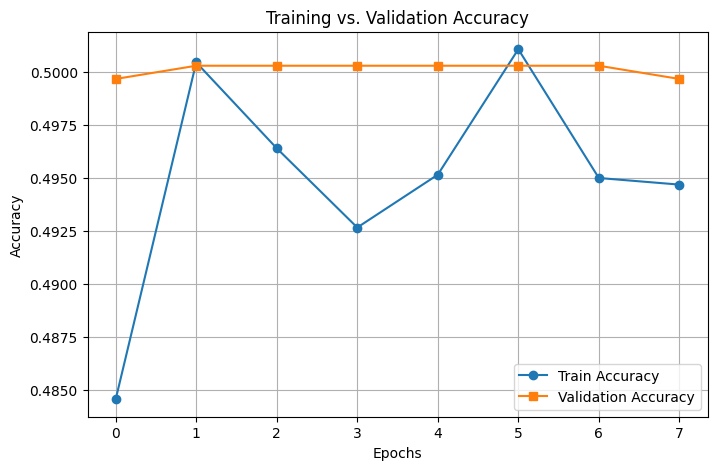

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.1670 - loss: 0.6949
Test accuracy: 0.5002


64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step


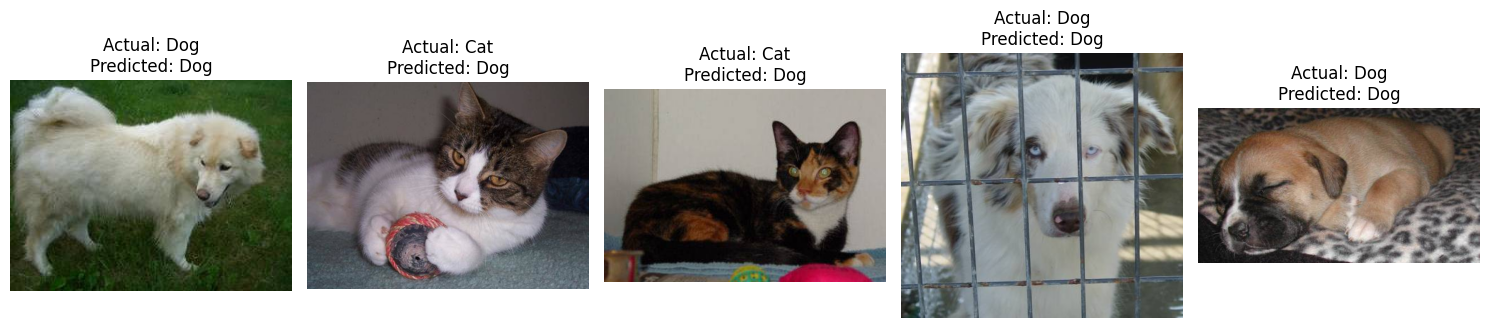

In [17]:
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).astype(int).flatten()
true_classes = test_generator.classes
filenames = test_generator.filenames
num_images_to_show = 5
random_indices = np.random.choice(len(filenames), size=num_images_to_show, replace=False)
plt.figure(figsize=(15, 10))
for i, index in enumerate(random_indices):
    image_path = os.path.join('/content/cat-and-dog/test_set/test_set',filenames[index])
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img)
    plt.title(f"Actual: {'Cat' if true_classes[index] == 0 else 'Dog'}\nPredicted: {'Cat' if predicted_classes[index] == 0 else 'Dog'}")
    plt.axis('off')

plt.tight_layout()
plt.show()